# Time series forecasting

# Initial setup

## Import required packages

In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Import time series data: Airline passenger traffic

In [19]:
data = pd.read_csv('sales-data.csv', header = None)
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m-%d')
data = data.set_index('Month')
data.head(12)

,Passengers
Month,
1980-01-01,154
1980-02-01,96
1980-03-01,73
1980-04-01,49
1980-05-01,36
1980-06-01,59
1980-07-01,95
1980-08-01,169
1980-09-01,219


# Time series analysis

## Plot time series data

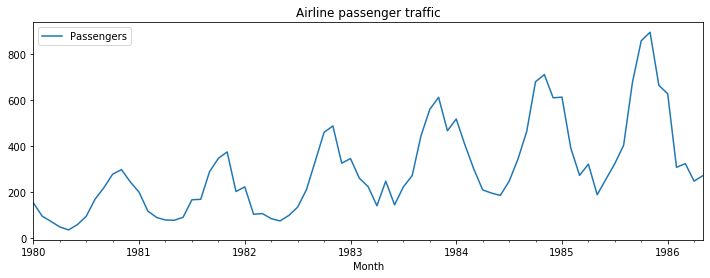

In [20]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

## Missing value treatment

### Mean imputation

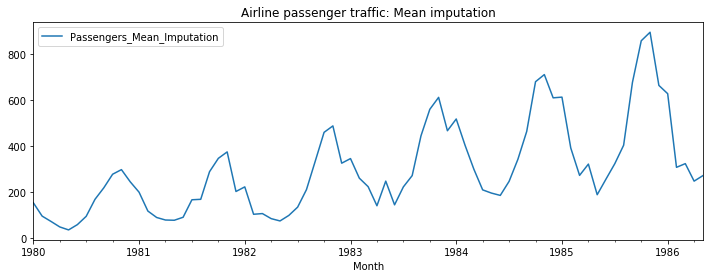

In [21]:
data = data.assign(Passengers_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))
data[['Passengers_Mean_Imputation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Mean imputation')
plt.show(block=False)

### Linear interpolation

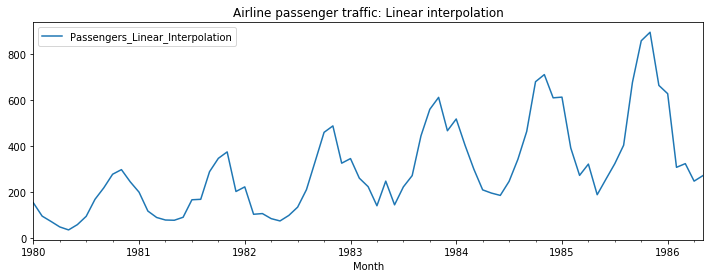

In [22]:
data = data.assign(Passengers_Linear_Interpolation=data.Passengers.interpolate(method='linear'))
data[['Passengers_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Linear interpolation')
plt.show(block=False)

### Use linear interpolation to impute missing values

In [23]:
data['Passengers'] = data['Passengers_Linear_Interpolation']
data.drop(columns=['Passengers_Mean_Imputation','Passengers_Linear_Interpolation'],inplace=True)

## Outlier detection

### Box plot and interquartile range

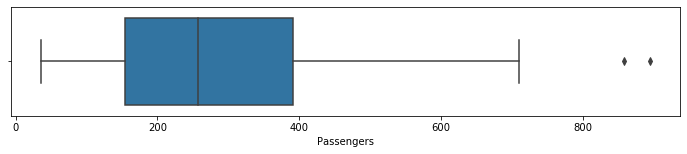

In [24]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Passengers'],whis=1.5)

### Histogram plot

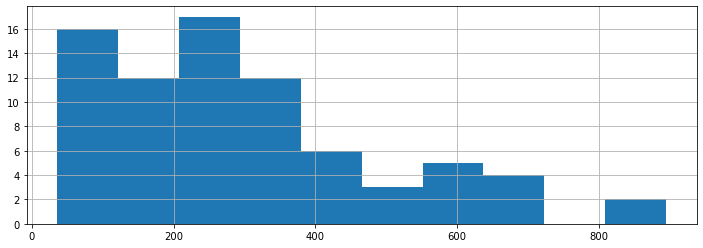

In [25]:
fig = data.Passengers.hist(figsize = (12,4))

## Time series Decomposition

### Additive seasonal decomposition

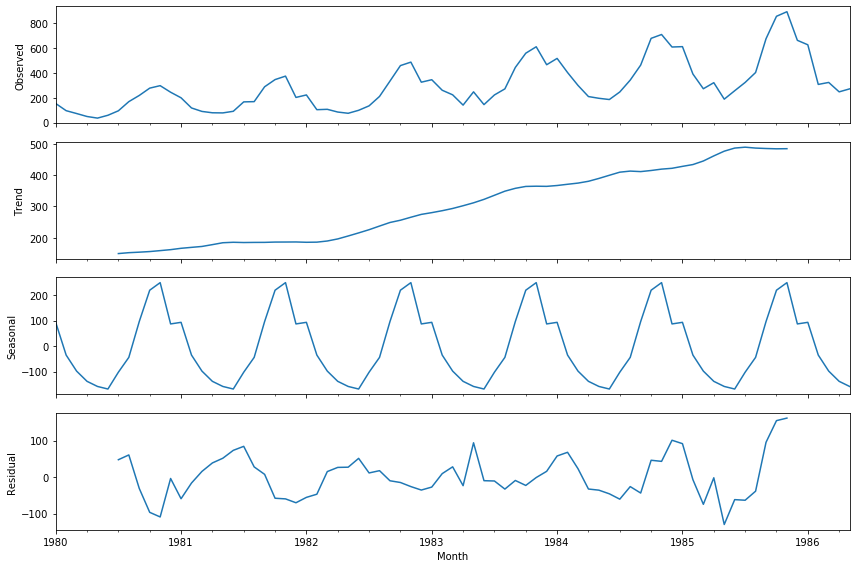

In [26]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

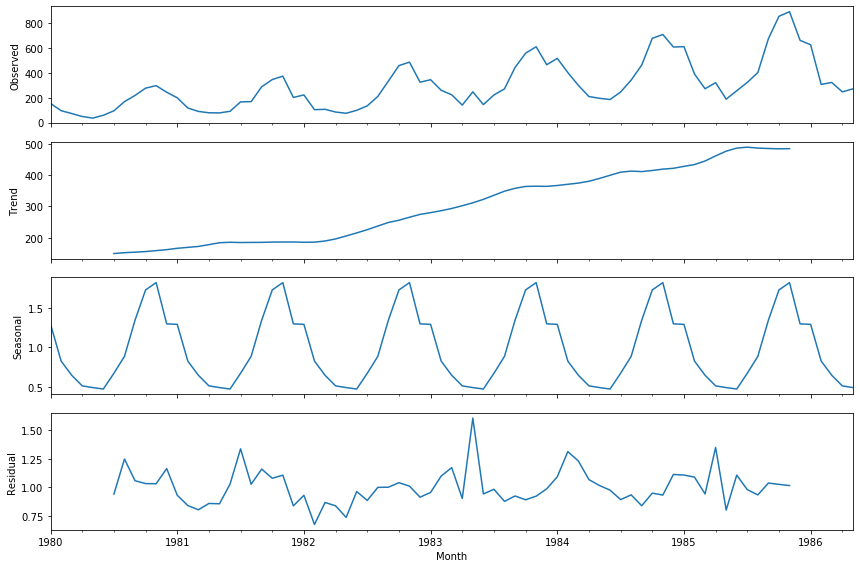

In [27]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# Build and evaluate time series forecast

## Split time series data into training and test set

In [72]:
train_len = 60
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [29]:
train.tail()

,Passengers
Month,
1984-09-01,464
1984-10-01,680
1984-11-01,711
1984-12-01,610
1985-01-01,613


# Simple time series methods

## Naive method

In [30]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

### Plot train, test and forecast

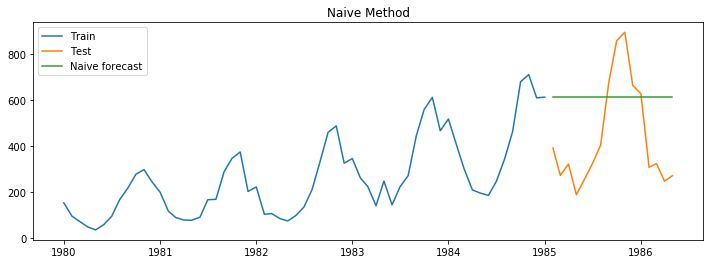

In [31]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [32]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,280.11,82.21


## Simple average method

In [33]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

### Plot train, test and forecast

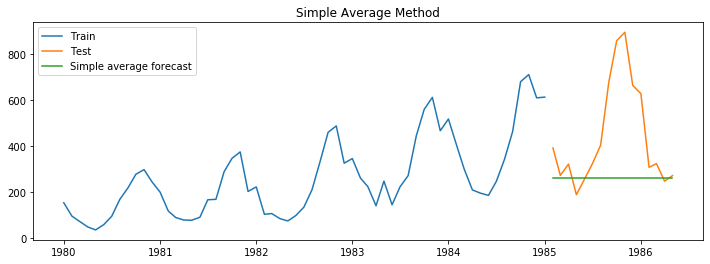

In [34]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [35]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_avg['avg_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,280.11,82.21
0,Simple average method,282.13,32.02


## Simple moving average method

In [36]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

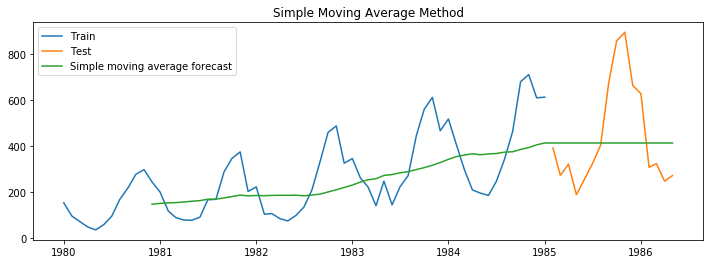

In [37]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [38]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,280.11,82.21
0,Simple average method,282.13,32.02
0,Simple moving average forecast,221.58,43.29


# Exponential smoothing methods

## Simple exponential smoothing

In [39]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

### Plot train, test and forecast

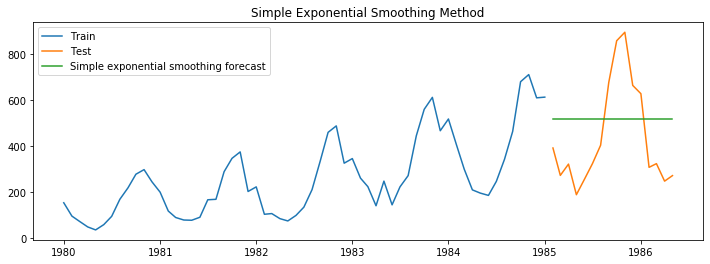

In [40]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [41]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,280.11,82.21
0,Simple average method,282.13,32.02
0,Simple moving average forecast,221.58,43.29
0,Simple exponential smoothing forecast,233.28,63.49


## Holt's method with trend

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 154.0, 'initial_slope': -58.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

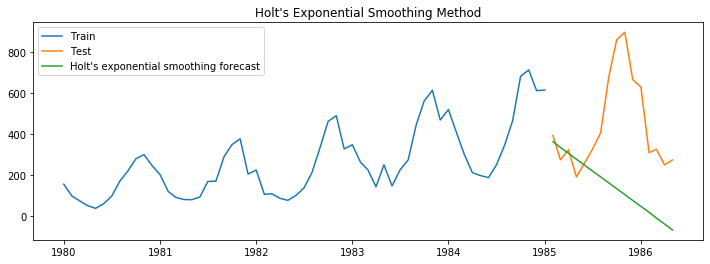

In [43]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [44]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,280.11,82.21
0,Simple average method,282.13,32.02
0,Simple moving average forecast,221.58,43.29
0,Simple exponential smoothing forecast,233.28,63.49
0,Holt's exponential smoothing method,401.11,65.10


## Holt Winters' additive method with trend and seasonality

In [47]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(16)

{'smoothing_level': 0.10526315789473684, 'smoothing_slope': 0.052567776847561774, 'smoothing_seasonal': 0.894736842105263, 'damping_slope': nan, 'initial_level': 342.0029672215884, 'initial_slope': 3.946549244761143, 'initial_seasons': array([-188.31042902, -246.31940446, -269.32132727, -293.32292196,
       -306.32895851, -283.33983912, -247.34937552, -173.37246682,
       -123.37715565,  -64.40298474,  -44.4292372 ,  -97.45628701]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

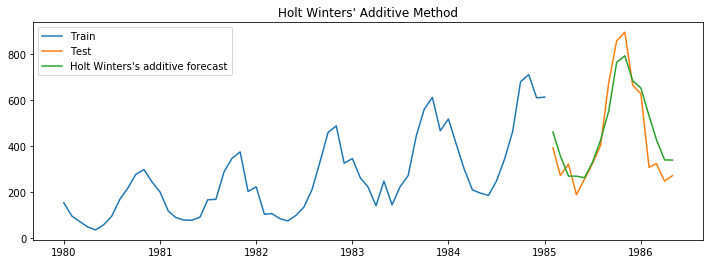

In [48]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [49]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,280.11,82.21
0,Simple average method,282.13,32.02
0,Simple moving average forecast,221.58,43.29
0,Simple exponential smoothing forecast,233.28,63.49
0,Holt's exponential smoothing method,401.11,65.10
0,Holt Winters' additive method,90.63,20.73


## Holt Winter's multiplicative method with trend and seasonality

In [50]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.631578947368421, 'damping_slope': nan, 'initial_level': 342.3333333333333, 'initial_slope': 3.0208333333333326, 'initial_seasons': array([0.44985394, 0.28042843, 0.21324245, 0.14313535, 0.10516066,
       0.17234664, 0.2775073 , 0.49367089, 0.63972736, 0.812074  ,
       0.87049659, 0.71567673]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


ValueError: Length of values does not match length of index

### Plot train, test and forecast

KeyError: 'hw_forecast'

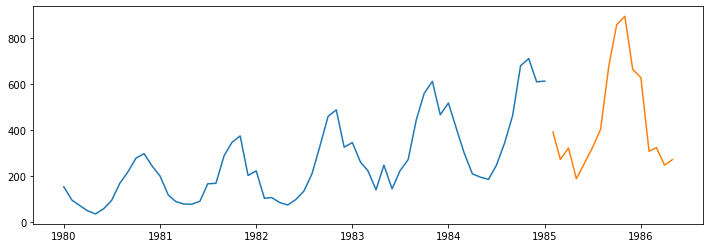

In [51]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [52]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwm['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

KeyError: 'hw_forecast'

# Course 2 - Timeseries forecasting

#### Stationary versus Non - Stationary Time Series

#### Timeseries Plot

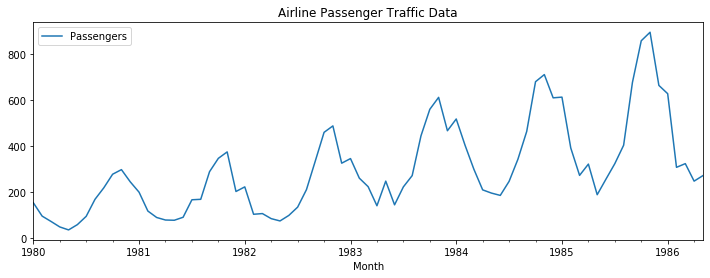

In [74]:
data['Passengers'].plot(figsize = (12,4))
plt.legend(loc = 'best')
plt.title('Airline Passenger Traffic Data')
plt.show()

### Augmented Dicky Fuller (ADF) Test

NULL Hypothesis: Series is not stationary

In [75]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Passengers'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

ADF Statistic: 0.581906
Critical Value @ 0.05: -2.91
p-value: 0.987161


### KPSS test

NULL Hypothesis: Series is stationary

In [76]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Passengers'])

print('KPSS Statistic %f' %kpss_test[0])
print('Critical Value @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value %f' % kpss_test[1])

KPSS Statistic 0.657628
Critical Value @ 0.05: 0.46
p-value 0.017397


Since p-value is less than critical value, we reject the NULL hypothesis. We reject the hypothesis that the series is stationary.

Hence, we don't have enough proof to prove the NULL hypothesis, so the ALTERNATE hypothesis hold good.


ALTERNATE Hypothesis: The series is not stationary

### Box-cox Transformation

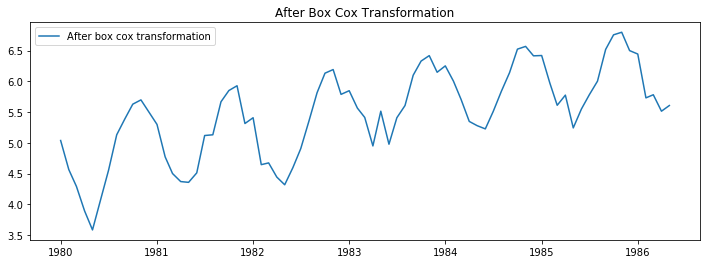

In [77]:
# box-cox is a power transformation tool
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda = 0), index = data.index)

plt.figure(figsize = (12,4))
plt.plot(data_boxcox, label = 'After box cox transformation')
plt.legend(loc='best')
plt.title('After Box Cox Transformation')
plt.show()

### Differencing

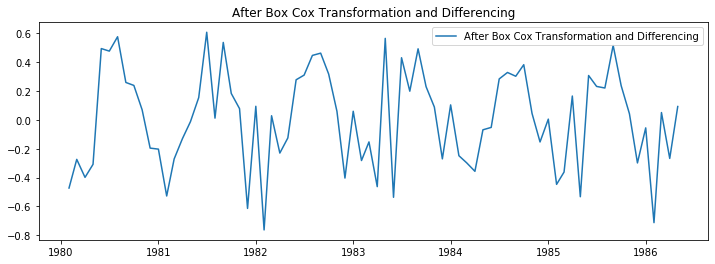

In [78]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), index = data.index)
data_boxcox_diff.dropna(inplace = True)

plt.figure(figsize = (12,4))
plt.plot(data_boxcox_diff, label = 'After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.title('After Box Cox Transformation and Differencing')
plt.show()

### ADF Test after Box Cox Transformation and Differencing

NULL Hypothesis: The Series is NOT stationary

In [79]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Value @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

ADF Statistic: -8.348568
Critical Value @ 0.05: -2.91
p-value: 0.000000


The p-value is 0.01, which is less than 0.05. Hence, we can reject the NULL hypothesis. 

The ALTERNATE Hypothesis states that the series is stationary.

### KPSS Test after Box Cox Transformation and Differencing

In [80]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic %f' %kpss_test[0])
print('Critical Value @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value %f' % kpss_test[1])

KPSS Statistic 0.225247
Critical Value @ 0.05: 0.46
p-value 0.100000


### Autocorrelation Function Plot

<function matplotlib.pyplot.show(*args, **kw)>

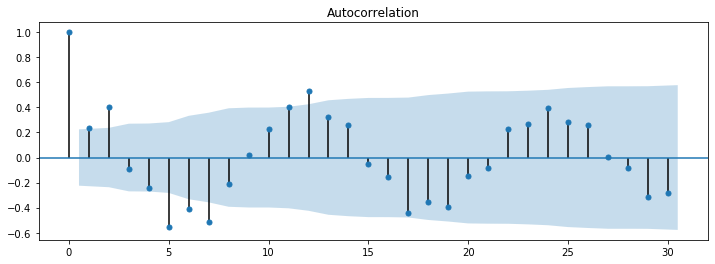

In [81]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize = (12,4))
acf = plot_acf(data_boxcox_diff, ax = plt.gca(), lags = 30)
plt.show

## Partial Autocorrelation function (PACF) plot

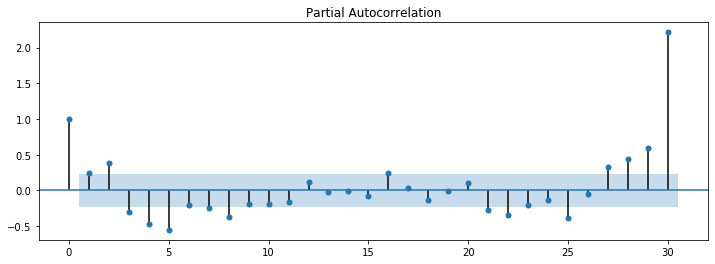

In [82]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize = (12,4))
pacf = plot_pacf(data_boxcox_diff, ax = plt.gca(), lags = 30)
plt.show()

## Splitting into training and testing period

In [83]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]

train_data_boxcox_diff = data_boxcox_diff[:train_len-1] #Here, we drop one value as we had dropped a value due to differencing
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]


## Auto Regression method (AR)

In [84]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order = (8,0,0))
model_fit = model.fit()
print(model_fit.params)

const      0.021119
ar.L1.y   -0.430964
ar.L2.y    0.027075
ar.L3.y   -0.104882
ar.L4.y   -0.113514
ar.L5.y   -0.375209
ar.L6.y   -0.327886
ar.L7.y   -0.496640
ar.L8.y   -0.361155
dtype: float64


### Recover Original Timeseries Forecast

In [85]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast data

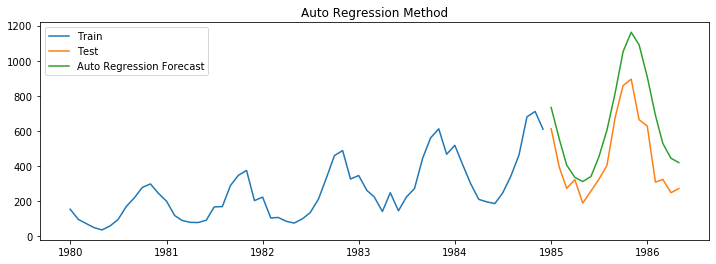

In [86]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label = 'Auto Regression Forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate RMSE and MAPE

In [87]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ar['ar_forecast'][test.index.min():])/test['Passengers'])*100,2)

results = pd.DataFrame({'Method':['Auto Regressive (AR) Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Auto Regressive (AR) Method,213.16,47.15
0,Moving Average (MA) Method,250.19,70.25


### Moving Average method (MA)


In [88]:
train_data_boxcox_diff.head()

Month
1980-02-01   -0.472604
1980-03-01   -0.273889
1980-04-01   -0.398639
1980-05-01   -0.308301
1980-06-01    0.494019
dtype: float64

In [89]:
model = ARIMA(train_data_boxcox_diff, order = (0, 0, 3))
model_fit = model.fit()
print(model_fit.params)

const      0.015665
ma.L1.y    0.161512
ma.L2.y    0.534114
ma.L3.y    0.172928
dtype: float64


### Recover Original Timeseries Forecast

In [90]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())

# Get rid of the differencing
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])

#Get rid of box cox transformation
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

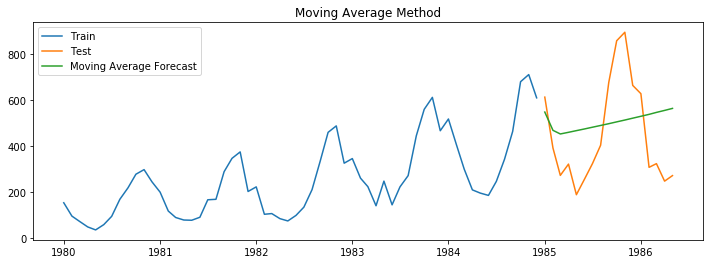

In [91]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label = 'Moving Average Forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [92]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Auto Regressive (AR) Method,213.16,47.15
0,Moving Average (MA) Method,250.19,70.25
0,Moving Average (MA) Method,221.38,56.66


## Auto Regressive Moving Average (ARMA) Model

In [93]:
model = ARIMA(train_data_boxcox_diff, order = (4,0,3))
model_fit = model.fit()
print(model_fit.params)

const      0.019247
ar.L1.y    0.255058
ar.L2.y    1.094360
ar.L3.y   -0.640848
ar.L4.y   -0.482690
ma.L1.y   -0.806490
ma.L2.y   -0.770900
ma.L3.y    0.984745
dtype: float64


In [94]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

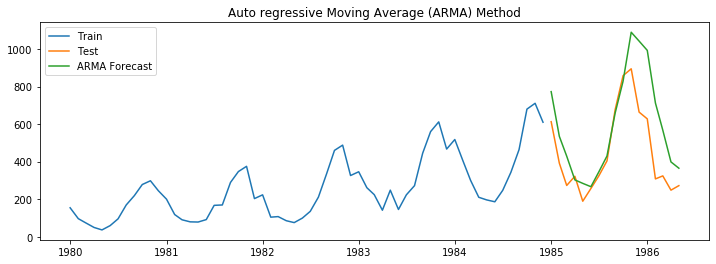

In [95]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label = 'ARMA Forecast')
plt.legend(loc='best')
plt.title('Auto regressive Moving Average (ARMA) Method')
plt.show()

In [96]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arma['arma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_arma['arma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regressive Moving Average (ARMA) Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Auto Regressive (AR) Method,213.16,47.15
0,Moving Average (MA) Method,250.19,70.25
0,Moving Average (MA) Method,221.38,56.66
0,Auto Regressive Moving Average (ARMA) Method,195.74,37.49


## Auto Regressive Integrate Moving Average Method

In [97]:
model = ARIMA(train_data_boxcox, order = (4,1,3))
model_fit = model.fit()
print(model_fit.params)

const        0.019247
ar.L1.D.y    0.255058
ar.L2.D.y    1.094360
ar.L3.D.y   -0.640848
ar.L4.D.y   -0.482690
ma.L1.D.y   -0.806490
ma.L2.D.y   -0.770900
ma.L3.D.y    0.984745
dtype: float64


In [102]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

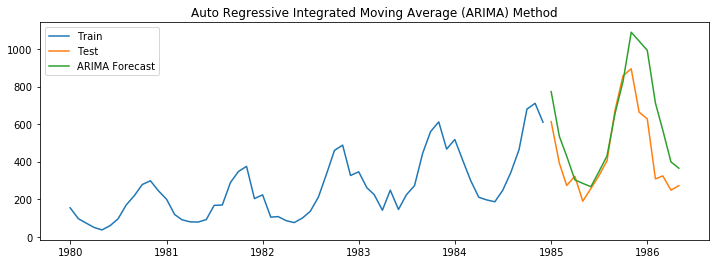

In [103]:
plt.figure(figsize = (12,4))
plt.plot(train['Passengers'], label = 'Train')
plt.plot(test['Passengers'], label = 'Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label = 'ARIMA Forecast')
plt.legend(loc='best')
plt.title('Auto Regressive Integrated Moving Average (ARIMA) Method')
plt.show()

In [104]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_arima['arima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Auto Regressive Integrated Moving Average (ARIMA) Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Auto Regressive (AR) Method,213.16,47.15
0,Moving Average (MA) Method,250.19,70.25
0,Moving Average (MA) Method,221.38,56.66
0,Auto Regressive Moving Average (ARMA) Method,195.74,37.49
0,Auto Regressive Integrated Moving Average (ARI...,195.74,37.49
0,Auto Regressive Integrated Moving Average (ARI...,195.74,37.49
